In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv('data/md0718_H1649_predicted_registration.csv')

In [3]:
data.head(3)

,Unnamed: 0,Pclass,SibSp,Parch,Sex,Age,Fare,Name,Cabin,Embarked,Survived
0,0,3.0,0.0,0.0,male,4.0,1.0,MR,F,QUEENSTOWN,0
1,1,3.0,1.0,0.0,female,5.0,1.0,MR,F,SOUTHAMPTON,0
2,2,2.0,0.0,0.0,male,7.0,1.0,MR,D,QUEENSTOWN,0


In [4]:
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

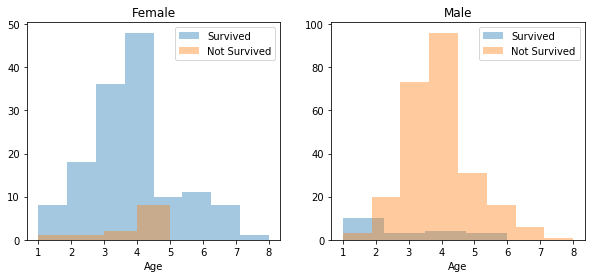

In [13]:
women_surv = survived[survived['Sex'] == 'female']
men_surv   = survived[survived['Sex'] == 'male']

women_no_surv = not_survived[not_survived['Sex'] == 'female']
men_no_surv   = not_survived[not_survived['Sex'] == 'male']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sbn.distplot(women_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Survived', 
                  ax = axes[0], kde = False)
ax = sbn.distplot(women_no_surv['Age'].dropna(), 
                  bins=4, 
                  label = 'Not Survived', 
                  ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sbn.distplot(men_surv['Age'].dropna(), 
                  bins = 4, 
                  label = 'Survived', 
                  ax = axes[1], kde = False)
ax = sbn.distplot(men_no_surv['Age'].dropna(), 
                  bins = 8, 
                  label = 'Not Survived', 
                  ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

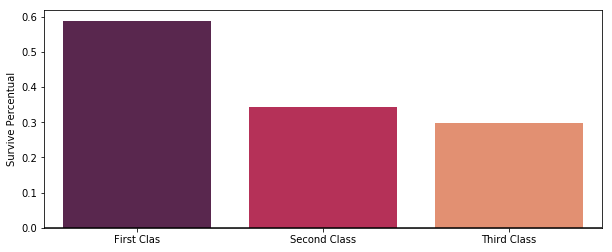

In [15]:
class_surv_perc = [0,0,0]

for i in range(3):
    total_class = sum(data['Pclass'] == i+1);
    survi_class = sum(survived['Pclass'] == i+1);
    
    class_surv_perc[i] = survi_class/total_class

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sbn.barplot(x = ['First Clas','Second Class','Third Class'], 
            y = class_surv_perc,
            palette="rocket"           
           )

ax1.axhline(0, color="k", clip_on=True)
ax1.set_ylabel("Survive Percentual");

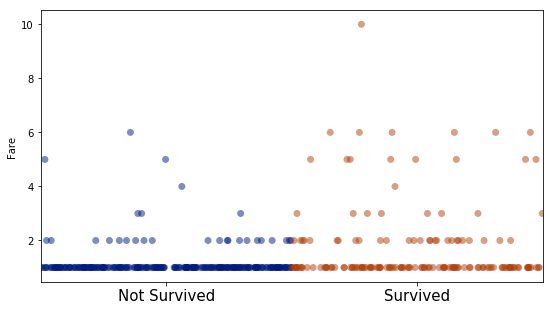

In [16]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 5))
sbn.stripplot(x = 'Survived', 
              y = 'Fare',
              data    = data,
              palette = 'dark',
              size    = 7,
              alpha   = 0.5,
              jitter  = 0.5
             )
ax1.set_xticklabels(['Not Survived', 'Survived'], 
                    fontsize=15, 
                    rotation='horizontal')
ax1.set_xlabel(' ');

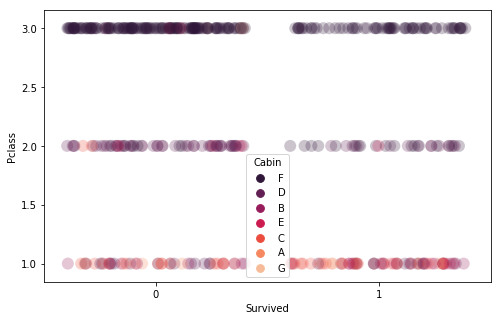

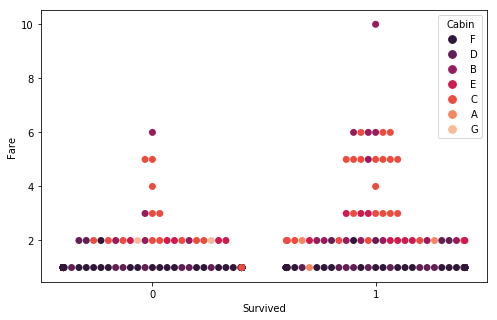

In [23]:
data['Cabin'] = data['Cabin']

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
sbn.stripplot(x = 'Survived',
              y = 'Pclass',
              data    = data,
              hue     = 'Cabin',
              palette = 'rocket',
              size    = 12,
              alpha   = 0.25,
              jitter  = 0.4
             );

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
sbn.swarmplot(x = 'Survived',
              y = 'Fare',
              data    = data,
              hue     = 'Cabin',
              palette = 'rocket',
              size    = 7,
             );